In [24]:
'''
手写r2(决定系数)计算方法

同时使用几个模型做训练
'''

'\n\xe6\x89\x8b\xe5\x86\x99r2(\xe5\x86\xb3\xe5\xae\x9a\xe7\xb3\xbb\xe6\x95\xb0)\xe8\xae\xa1\xe7\xae\x97\xe6\x96\xb9\xe6\xb3\x95\n\n\xe5\x90\x8c\xe6\x97\xb6\xe4\xbd\xbf\xe7\x94\xa8\xe5\x87\xa0\xe4\xb8\xaa\xe6\xa8\xa1\xe5\x9e\x8b\xe5\x81\x9a\xe8\xae\xad\xe7\xbb\x83\n'

## 计算r2与皮尔逊相关度

In [25]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [26]:
def xss(y, y_pred):
    y = y.ravel()
    y_pred = y_pred.ravel()
    
    #手写公式 
    tss = ((y - np.average(y)) ** 2).sum()
    rss = ((y_pred - y) ** 2).sum()
    ess = ((y_pred - np.average(y)) ** 2).sum()
    r2 = 1 - rss/tss
    
    #工具计算
    #tss = np.var(y)
    #rss = np.average((y_pred - y) ** 2)
    #r2 = 1 - rss/tss
    
    tss_list.append(tss)
    rss_list.append(rss)
    ess_list.append(ess)
    ess_rss_list.append(rss + ess)
    
    corr_coef = np.corrcoef(y, y_pred)[0,1]
    return r2, corr_coef

## 造数据

In [27]:
np.random.seed(0)
N = 9
x = np.linspace(0, 6, N) + np.random.randn(N)
x = np.sort(x)
y = x**2 - 4*x - 3 + np.random.randn(N)
x.shape = -1,1
y.shape = -1,1

## 构造模型

In [28]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning

In [29]:
models = [Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression(fit_intercept=False))
    ]),
    Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', RidgeCV(alphas=np.logspace(-3,2,10), fit_intercept=False))
    ]),
    Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', LassoCV(alphas=np.logspace(-3,2,10), fit_intercept=False)),
    ]),
    Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', ElasticNetCV(alphas=np.logspace(-3,2,10),fit_intercept=False, \
                 l1_ratio=[.1, .5, .7, .9, .95, .99, 1]))
    ])]

In [30]:
# 多项式阶数
d_pool = np.arange(1,N,1)
m = d_pool.size

In [31]:
# 颜色
clrs = []
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x' % c)
#线宽
line_width = np.linspace(5,2,m)
titles = u'线性回归',u'Ridge回归',u'Lasso',u'ElasticNet'

tss_list = []
rss_list = []
ess_list = []
ess_rss_list = []

线性回归: 1阶,系数为： [-12.12113792   3.05477422]
线性回归: 2阶,系数为： [-3.23812184 -3.36390661  0.90493645]
线性回归: 3阶,系数为： [-3.90207326 -2.61163034  0.66422328  0.02290431]
线性回归: 4阶,系数为： [-8.20599769  4.20778207 -2.85304163  0.73902338 -0.05008557]
线性回归: 5阶,系数为： [ 21.59733285 -54.12232017  38.43116219 -12.68651476   1.98134176
  -0.11572371]
线性回归: 6阶,系数为： [  1.47330478e+01  -3.78731749e+01   2.36746234e+01  -6.07037979e+00
   4.25368328e-01   6.80313226e-02  -8.59245537e-03]
线性回归: 7阶,系数为： [  3.14303446e+02  -8.27894469e+02   8.57332932e+02  -4.65465436e+02
   1.44218839e+02  -2.56729468e+01   2.44658612e+00  -9.67594134e-02]
线性回归: 8阶,系数为： [ -1.18950149e+03   3.64369109e+03  -4.64792941e+03   3.21722815e+03
  -1.32587384e+03   3.34328691e+02  -5.05711912e+01   4.21251817e+00
  -1.48521001e-01]
Ridge回归: 1阶,alpha=0.166810,系数为： [-10.79755177   2.75712205]
Ridge回归: 2阶,alpha=0.166810,系数为： [-2.86616277 -3.50791358  0.918189  ]
Ridge回归: 3阶,alpha=0.046416,系数为： [-3.54779374 -2.8374223   0.70197829  0.02141529]

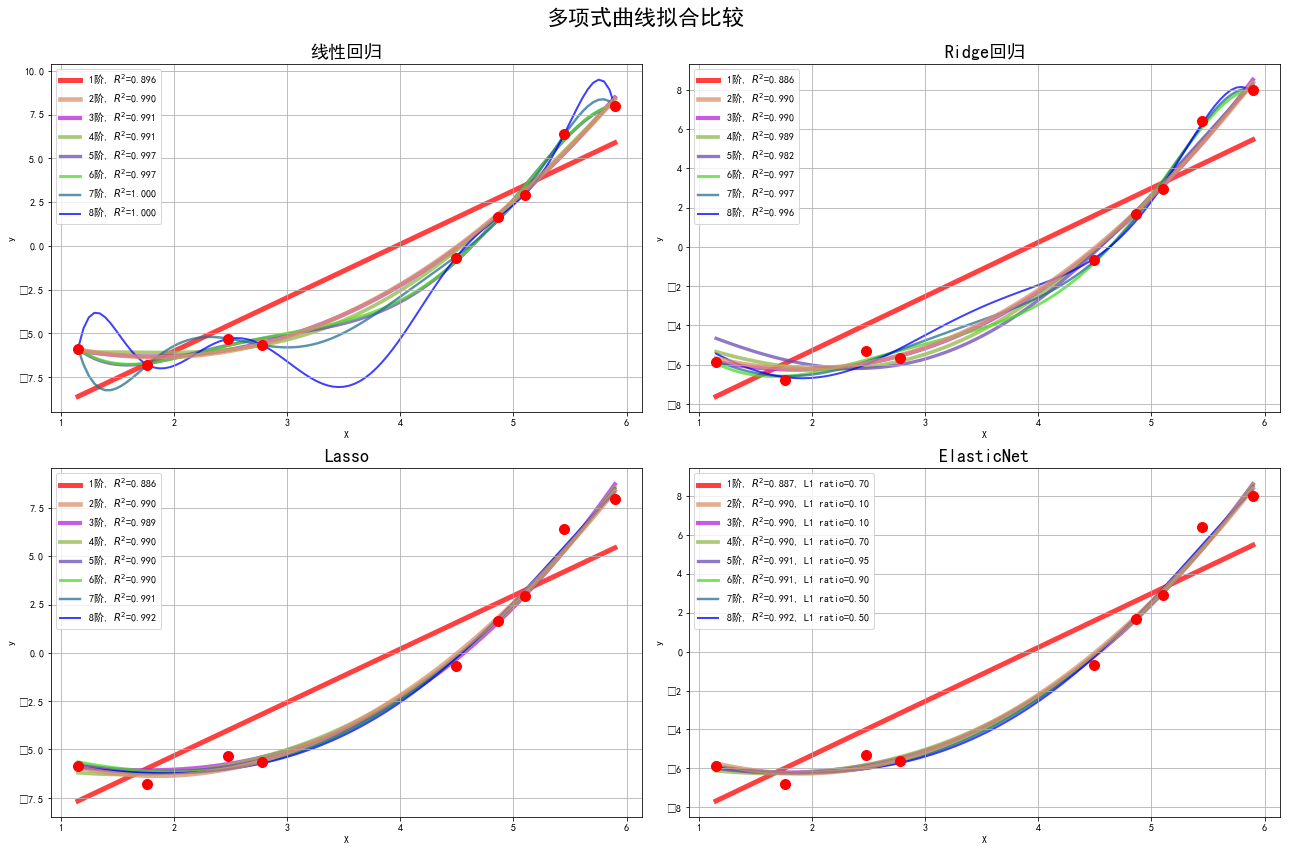

In [32]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
plt.figure(figsize=(18,12))

for t in range(4):
    model = models[t]
    plt.subplot(2,2,t+1)
    plt.plot(x, y, 'ro', ms=10, zorder=N)
    for i,d in enumerate(d_pool):
        model.set_params(poly__degree=d)
        model.fit(x,y.ravel())
        linear = model.get_params('linear')['linear']
        
        #这里只是为了打印信息而已
        output = u'%s: %d阶,系数为：' % (titles[t], d)
        if hasattr(linear, 'alpha_'):
            idx = output.find(u'系数')
            output = output[:idx] + (u'alpha=%.6f,' % linear.alpha_) + output[idx:]
        if hasattr(linear, 'l1_ratio_'):
            idx = output.find(u'系数')
            output = output[:idx] + (u'l1_ratio=%.6f,' % linear.l1_ratio_) + output[idx:]
        print output, linear.coef_.ravel()
        
        #预测
        x_hat = np.linspace(x.min(), x.max(), num=100)
        x_hat.shape = -1,1
        y_hat = model.predict(x_hat)
        s = model.score(x,y)
        r2, corr_coef = xss(y, model.predict(x))
        
        #使二阶多项式更突出
        z = N - 1 if (d == 2) else 0
        
        #动态制作图表标签label
        label = u'%d阶, $R^2$=%.3f' % (d, s)
        if hasattr(linear, 'l1_ratio_'):
            label += u', L1 ratio=%.2f' % linear.l1_ratio_
        
        #绘图
        plt.plot(x_hat, y_hat, color=clrs[i], lw=line_width[i], alpha=0.75, \
                label=label, zorder=z)
    #设置图表属性
    plt.legend(loc='best')
    plt.grid(True)
    plt.title(titles[t], fontsize=18)
    plt.xlabel('X')
    plt.ylabel('y')
plt.tight_layout(1, rect=(0, 0, 1, 0.95))
plt.suptitle(u'多项式曲线拟合比较', fontsize=22)
plt.show()

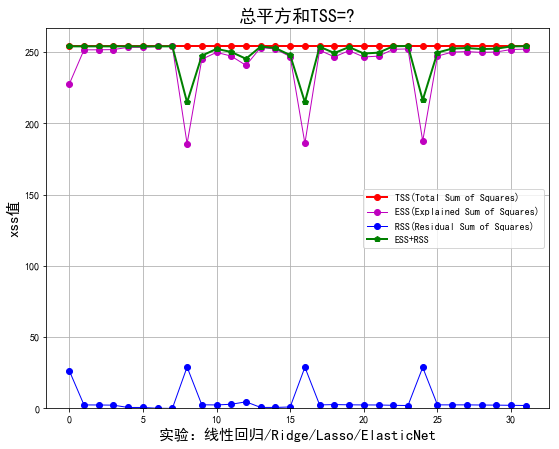

In [34]:
y_max = max(max(tss_list), max(ess_rss_list)) * 1.05
t = np.arange(len(tss_list))

plt.figure(figsize=(9,7))
plt.plot(t, tss_list, 'ro-', lw=2, label=u'TSS(Total Sum of Squares)')
plt.plot(t, ess_list, 'mo-', lw=1, label=u'ESS(Explained Sum of Squares)')
plt.plot(t, rss_list, 'bo-', lw=1, label=u'RSS(Residual Sum of Squares)')
plt.plot(t, ess_rss_list, 'gp-', lw=2, label=u'ESS+RSS')
plt.ylim((0, y_max))
plt.legend(loc='center right')
plt.xlabel(u'实验：线性回归/Ridge/Lasso/ElasticNet', fontsize=15)
plt.ylabel(u'xss值', fontsize=15)
plt.title(u'总平方和TSS=?', fontsize=18)
plt.grid(True)
plt.show()